# Introduction
This notebook presents a comprehensive analysis of football team statistics from 2010 to 2022. The data used in this analysis is sourced from [Pro-Football-Reference](https://www.pro-football-reference.com/), a reputable platform for football statistics. The aim of this project is to identify patterns and correlations between different team statistics and their impact on the number of wins. This analysis could provide valuable insights for team management, strategists, and football enthusiasts.

The data includes the following columns:
- **Tm**: The name of the team.
- **W**: The number of games won.
- **L**: The number of games lost.
- **PF**: Points For, the total number of points scored by the team.
- **PA**: Points Against, the total number of points scored against the team.
- **PD**: Point Differential, the difference between Points For and Points Against.
- **MoV**: Margin of Victory, the average point differential per game.
- **SoS**: Strength of Schedule, a rating of strength of the teams played.
- **SRS**: Simple Rating System, a team rating that takes into account average point differential and strength of schedule. The rating is denominated in points above/below average, where zero is average.
- **OSRS**: Offensive SRS, a rating of the team's offense, denominated in points above/below average, where zero is average.
- **DSRS**: Defensive SRS, a rating of the team's defense, denominated in points above/below average, where zero is average.



In [ ]:
import pandas as pd

# Initialize an empty dataframe to store the data for all years
NFL_all_years = pd.DataFrame()

# Loop over each year from 2013 to 2022
for year in range(2010, 2023):
    # URL of the webpage
    url = f'https://www.pro-football-reference.com/years/{year}/#team_stats'

    # Use pandas to read the table into a dataframe
    tables = pd.read_html(url)

    # The first table on the page is the one we want
    AFC = tables[0]
    NFC = tables[1]
    NFL = pd.concat([AFC, NFC], ignore_index = True)

    # Add a column for the year
    NFL['Year'] = year

    # Append the data for this year to the overall dataframe
    NFL_all_years = NFL_all_years.append(NFL, ignore_index=True)

# Clean data by getting rid of divisions
divisions = ['AFC North', 'AFC South', 'AFC East', 'AFC West', 'NFC North', 'NFC South', 'NFC East', 'NFC West']
NFL_all_years = NFL_all_years[~NFL_all_years['Tm'].isin(divisions)]

# Display the first few rows of the dataframe
NFL_all_years.head(100)

In [ ]:
# Convert 'W', 'PF' and other relevant columns to numeric values
numeric_columns = ['W', 'L', 'PF', 'PA', 'PD', 'MoV', 'SoS', 'SRS', 'OSRS', 'DSRS']
for col in numeric_columns:
    NFL_all_years[col] = pd.to_numeric(NFL_all_years[col], errors='coerce')

# Display the first few rows of the cleaned dataframe
NFL_all_years.head()

In [ ]:
# Calculate the correlation matrix
correlation_matrix = NFL_all_years.corr()

# Display the correlation between 'W' and other team stats
correlation_matrix['W']

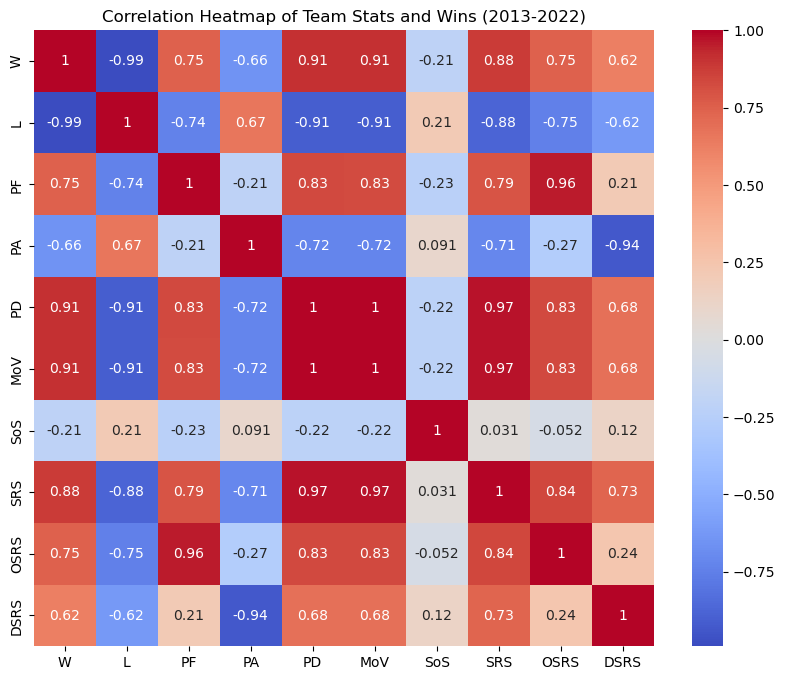

In [ ]:
# Remove the 'Year' column from the correlation matrix
correlation_matrix_no_year = correlation_matrix.drop('Year', axis=1).drop('Year', axis=0)

# Create a heatmap from the correlation matrix without 'Year'
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_no_year, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Team Stats and Wins (2013-2022)')
plt.show()

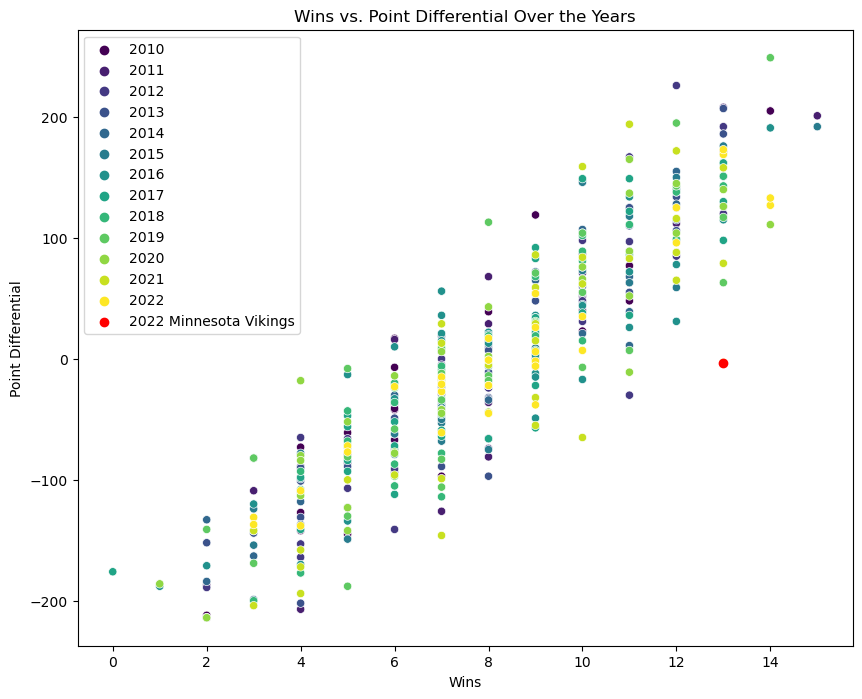

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a scatterplot of Wins vs. Point Differential for all years
plt.figure(figsize=(10, 8))
scatter = sns.scatterplot(x='W', y='PD', data=NFL_all_years, hue='Year', palette='viridis', legend='full')

# Highlight the 2022 Vikings
vikings_2022 = NFL_all_years[(NFL_all_years['Tm'] == 'Minnesota Vikings*') & (NFL_all_years['Year'] == 2022)]
plt.scatter(vikings_2022['W'], vikings_2022['PD'], color='red', label='2022 Minnesota Vikings')

plt.title('Wins vs. Point Differential Over the Years')
plt.xlabel('Wins')
plt.ylabel('Point Differential')
plt.legend()
plt.show()

The 2022 Minnesota Vikings are highlighted in red. As you can see, they stand out as an anomaly not only in the 2022 season but also across all seasons from 2013 to 2022. Despite having a relatively low point differential, they had a significant number of wins. This suggests that the 2022 Vikings were particularly effective at winning close games, making them a unique case in the dataset.






## Conclusion

The comprehensive analysis of NFL team statistics from 2010 to 2022 provides valuable insights into the key factors that contribute to a team's success:

1. **Points Difference (PD)**: Teams that consistently score more points than they concede are more likely to secure victories. The strong positive correlation between the number of wins and the points difference underscores the importance of both a potent offense and a resilient defense.

2. **Margin of Victory (MoV)**: The margin of victory is another crucial factor. Teams that win by larger margins tend to accumulate more victories over the season. This could be indicative of the team's ability to maintain performance levels throughout the game and close out matches effectively.

3. **Simple Rating System (SRS)**: The SRS, which considers both a team's margin of victory and the strength of its schedule, also shows a strong positive correlation with the number of wins. Teams with higher SRS scores, which suggest superior performance against formidable opponents, tend to win more games. This highlights the importance of a team's ability to rise to the challenge when facing strong competition.

In conclusion, to enhance their chances of winning, NFL teams should strive to outscore their opponents by as wide a margin as possible and perform well against strong opponents. These factors, more than just the number of points scored or conceded, appear to play a significant role in a team's success.